In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
traindata = pd.read_csv('cancer-data-train.csv').to_numpy()
testdata = pd.read_csv('cancer-data-test.csv').to_numpy()

Average C(0.01) = 0.6641765881096056
Average C(0.1) = 0.8667566877962013
Average C(1) = 0.9044037922805194
Average C(10) = 0.9078617413504769
Average C(100) = 0.9244521279032412


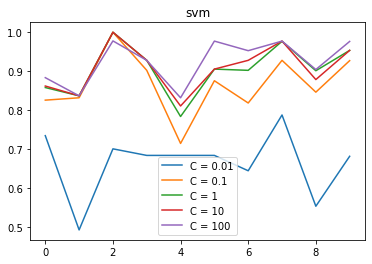

In [42]:
ourC = [.01,.1,1,10,100]

SVM_data = dict()
for i in ourC:
    clf = svm.SVC(i)
    scores = cross_val_score(clf, traindata[:,:-1], traindata[:,-1], cv=10, scoring='f1_macro')
    print('Average C({}) = {}'.format(i,np.average(scores)))
    SVM_data.update({str(i):np.average(scores)})
    plt.plot(scores, label = "C = "+str(i))
plt.title('svm')
plt.legend()
plt.show()


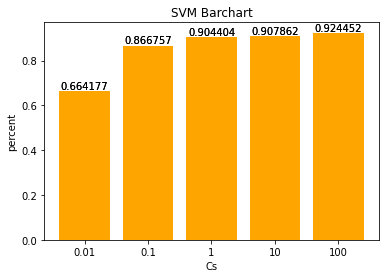

In [41]:
courses = list(SVM_data.keys())
values = list(SVM_data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='orange')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("Cs")
plt.ylabel("percent")
plt.title("SVM Barchart")
plt.show()

Average K(1) = 0.911575457803969
Average K(2) = 0.9009926795392922
Average K(5) = 0.9307855383962507
Average K(10) = 0.9179216615378911
Average K(50) = 0.89708466378867


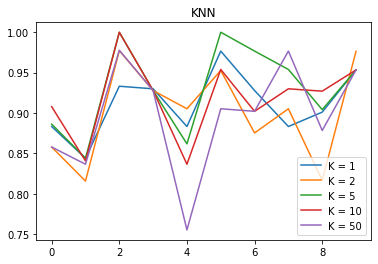

In [43]:
ourK = [1,2,5,10,50]

KNN_data= dict()
for i in ourK:
    clf = KNeighborsClassifier(i)
    scores = cross_val_score(clf, traindata[:,:-1], traindata[:,-1], cv=10, scoring='f1_macro')
    print('Average K({}) = {}'.format(i,np.average(scores)))
    KNN_data.update({str(i):np.average(scores)})
    
    plt.plot(scores, label = "K = "+str(i))
plt.title('KNN')
plt.legend()
plt.show()


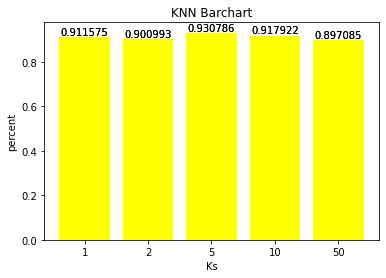

In [39]:
courses = list(KNN_data.keys())
values = list(KNN_data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='yellow')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("Ks")
plt.ylabel("percent")
plt.title("KNN Barchart")
plt.show()

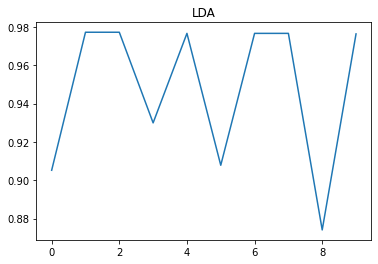

In [55]:

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, traindata[:,:-1], traindata[:,-1], cv=10, scoring='f1_macro')
plt.plot(scores)
plt.title('LDA')
plt.show()


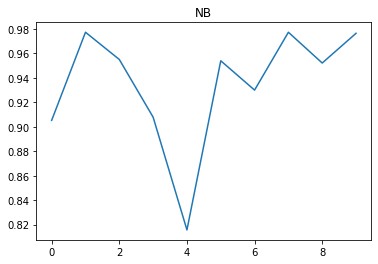

In [9]:

clf = GaussianNB()
scores = cross_val_score(clf, traindata[:,:-1], traindata[:,-1], cv=10, scoring='f1_macro')
plt.plot(scores)
plt.title('NB')
plt.show()


Average hidden size(10) = 0.6649975698516969
Average hidden size(50) = 0.8942926962885454
Average hidden size(100) = 0.9100396641498808
Average hidden size((10, 50)) = 0.8921963006957399
Average hidden size((50, 100)) = 0.8785141286556696
Average hidden size((10, 100, 50)) = 0.8991815857622001


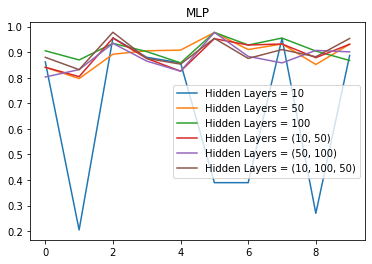

In [46]:
ourHiddens = [(10),(50),(100),(10,50),(50,100),(10,100,50)]
op = ['lbfgs', 'sgd', 'adam']

data = dict()
for i in ourHiddens:
    clf = MLPClassifier(hidden_layer_sizes=i,max_iter=600)
    scores = cross_val_score(clf, traindata[:,:-1], traindata[:,-1], cv=10, scoring='f1_macro')
    print('Average hidden size({}) = {}'.format(i,np.average(scores)))
    data.update({str(i):np.average(scores)})

    plt.plot(scores, label = "Hidden Layers = "+str(i))
plt.title('MLP')
plt.legend()
plt.show()

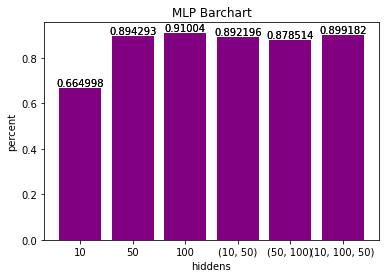

In [47]:
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='purple')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("hiddens")
plt.ylabel("percent")
plt.title("MLP Barchart")
plt.show()

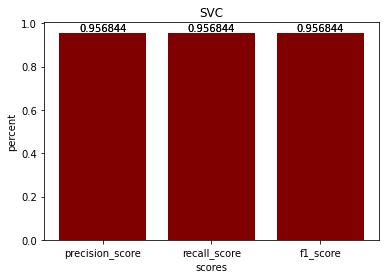

In [61]:
clf = svm.SVC(100)
clf.fit(traindata[:,:-1], traindata[:,-1])

data = {'precision_score':precision_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'recall_score':recall_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'f1_score':f1_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro')
       }
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='maroon')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("scores")
plt.ylabel("percent")
plt.title("SVC")
plt.show()

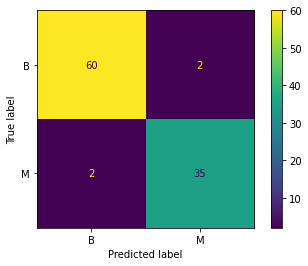

In [62]:
plot_confusion_matrix(clf, testdata[:,:-1],testdata[:,-1])

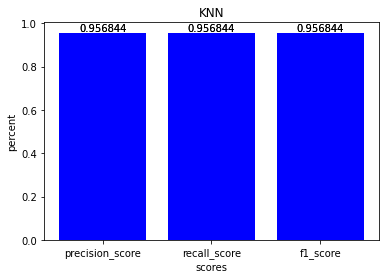

In [63]:
clf = KNeighborsClassifier(5)
clf.fit(traindata[:,:-1], traindata[:,-1])

data = {'precision_score':precision_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'recall_score':recall_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'f1_score':f1_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro')
       }
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='blue')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("scores")
plt.ylabel("percent")
plt.title("KNN")
plt.show()

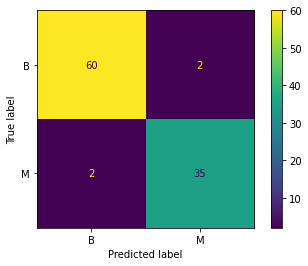

In [64]:
plot_confusion_matrix(clf, testdata[:,:-1],testdata[:,-1])

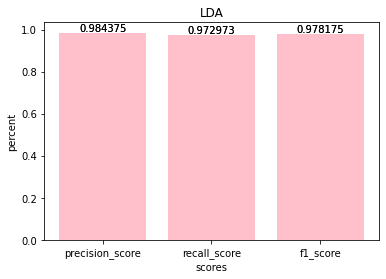

In [66]:
clf = LinearDiscriminantAnalysis()
clf.fit(traindata[:,:-1], traindata[:,-1])

data = {'precision_score':precision_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'recall_score':recall_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'f1_score':f1_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro')
       }
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='pink')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("scores")
plt.ylabel("percent")
plt.title("LDA")
plt.show()

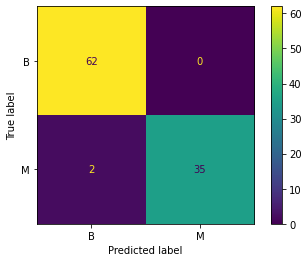

In [67]:
plot_confusion_matrix(clf, testdata[:,:-1],testdata[:,-1])

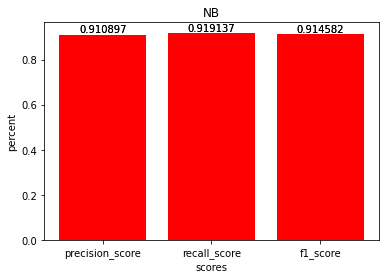

In [68]:
clf = GaussianNB()
clf.fit(traindata[:,:-1], traindata[:,-1])

data = {'precision_score':precision_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'recall_score':recall_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'f1_score':f1_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro')
       }
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='red')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("scores")
plt.ylabel("percent")
plt.title("NB")
plt.show()

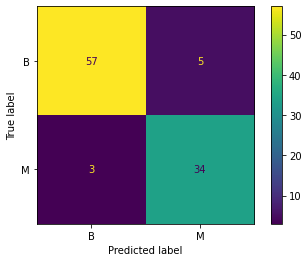

In [69]:
plot_confusion_matrix(clf, testdata[:,:-1],testdata[:,-1])

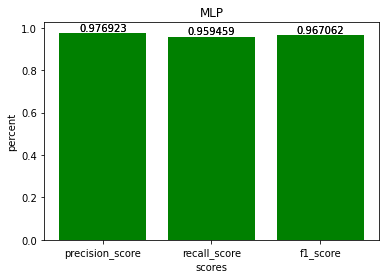

In [70]:
clf = MLPClassifier(hidden_layer_sizes=(100),max_iter=600)
clf.fit(traindata[:,:-1], traindata[:,-1])

data = {'precision_score':precision_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'recall_score':recall_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'f1_score':f1_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro')
       }
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='green')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("scores")
plt.ylabel("percent")
plt.title("MLP")
plt.show()

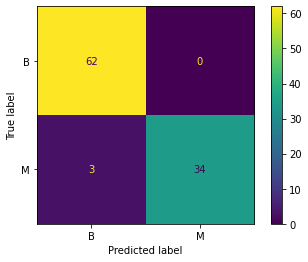

In [71]:
plot_confusion_matrix(clf, testdata[:,:-1],testdata[:,-1])

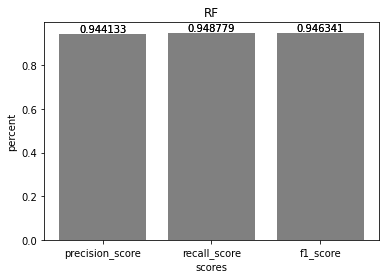

In [72]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(traindata[:,:-1], traindata[:,-1])

data = {'precision_score':precision_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'recall_score':recall_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro'),
        'f1_score':f1_score(testdata[:,-1],clf.predict(testdata[:,:-1]), average='macro')
       }
courses = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
bars = ax.bar(courses, values, color ='gray')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

    
plt.xlabel("scores")
plt.ylabel("percent")
plt.title("RF")
plt.show()

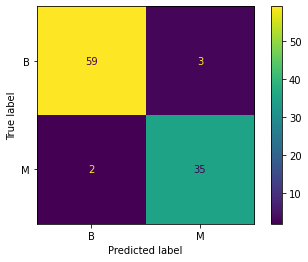

In [73]:
plot_confusion_matrix(clf, testdata[:,:-1],testdata[:,-1])